# Fraudlock Holems - Credit Card Fraud Detection using Machine Learning

In [3]:
# Import libraries test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

## Extract Data

In [4]:
# Extract the fraud data from the CSV file and create a dataframe
data = pd.read_csv('creditcard.csv')

# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)

(28481, 31)


## Explore the Dataset

count    28481.000000
mean        89.957884
std        270.894630
min          0.000000
25%          5.980000
50%         22.350000
75%         78.930000
max      19656.530000
Name: Amount, dtype: float64
0.0017234102419808666
Fraud Cases: 49
Valid Cases: 28432
+-------------+-------------+
| Fraud Cases | Valid Cases |
+-------------+-------------+
|      49     |    28432    |
+-------------+-------------+
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


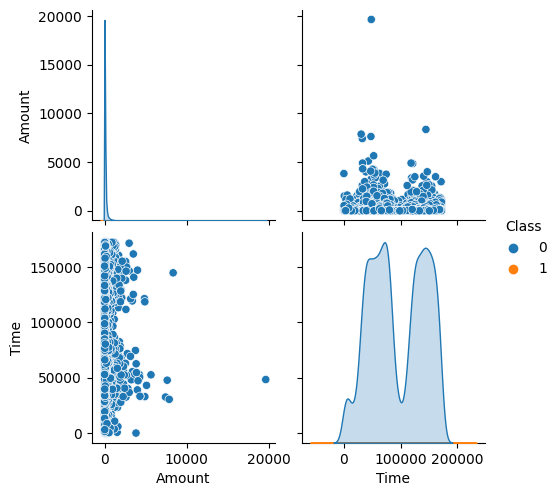

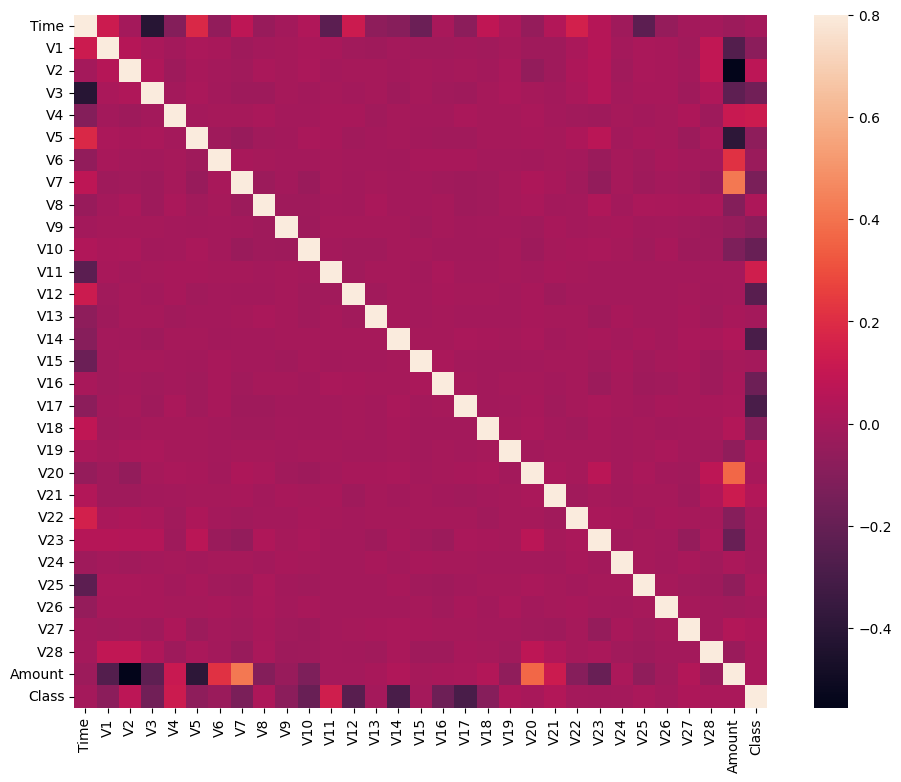

In [6]:

print(data["Amount"].describe())


# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

# create plotted table of fraud and valid cases
table = PrettyTable(["Fraud Cases", "Valid Cases"])
table.add_row([len(fraud), len(valid)])
print(table)

# Check for Null values
print(data.isnull().sum())

# Plot histograms of each parameter using seaborn
sns.pairplot(data=data, hue='Class', vars=['Amount', 'Time'])


# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()



## Feature Engineering